In [1]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/2022/lesson4')

import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/matteosan1/finance_course/develop/course.mplstyle')

Mounted at /content/drive


## Random Variable

* A random variable is a variable whose values depend on outcomes of a random phenomenon
    * coin toss: only two outcomes are possible: heads or tails;
    * random variable to represent the result of three dice rolls: it could be somewhere between 3 (1+1+1) and 18 (6+6+6).

#### Other Examples
* In the corporate world, random variables can be assigned to:
    * average price of an asset over a given time period; 
    * return on investment after a specified number of years;
    * the estimated turnover rate at a company within the following six months. 
* Risk analysts assign random variables to risk models when they want to estimate the probability of an adverse event occurring.

* The *variable* $x$ in an algebraic equation is an unknown value that can be calculated
$$10 + x = 13 \implies x=3$$
* **A *random variable* $X$ has a set of values, and any of those values could be the resulting outcome each of them with a certain probability (probability density function PDF).**

* When the range of possible values for $X$ is infinite it is called a *continuous random variable*; contrary it is *discrete*.


In [4]:
# check norm pdf @ 0
from scipy.stats import norm

norm.pdf(0)

0.3989422804014327

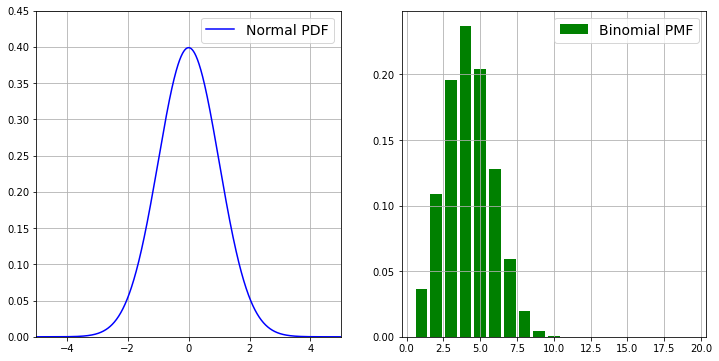

In [20]:
import numpy as np
from scipy.stats import binom

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
x = np.arange(-5, 5, 0.01)
ax[0].plot(x, norm.pdf(x), label="Normal PDF")
ax[0].grid(True)
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 0.45)
ax[0].legend()
ax[1].bar(range(1, 20), binom(12, 0.35).pmf(range(1, 20)), color='green', label='Binomial PMF') 
ax[1].grid(True)
ax[1].legend()
plt.show()

* The probability density function is non-negative everywhere, and its integral over the entire space is equal to 1. 

## CDF and Quantiles

* The cumulative distribution function (CDF) $F$ of a random variable $X$ (with PDF $f(x)$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F_X(x) = Pr(X\leq x) = \int_{-\infty}^{x} f(x)dx$$

$$Pr(a \leq X\leq b) = \int_{-\infty}^{b} f(x)dx - \int_{-\infty}^{a} f(x)dx = \int_{a}^{b} f(x)dx$$

* The quantile function $Q$, associated with a probability distribution of a random variable, and evaluated in $p$ specifies the value $x$ of the random variable such that the probability $p$ of the variable being less than or equal to that value equals the given probability. 
    * It is also called the percent-point function (PPF) or inverse cumulative distribution.

$$Q_X(p) = F_X^{-1}(X \leq x_p)\;\;\textrm{where}\; F_X(x_p) = p$$

* The quantile function does the "inverse" of the cumulative distribution function.


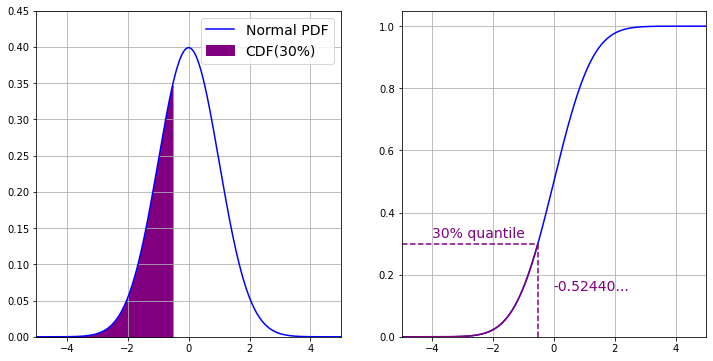

In [48]:
x0 = norm.ppf(0.3)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

x = np.arange(-5, 5, 0.01)

ax[0].plot(x, norm.pdf(x), label="Normal PDF")
ax[0].grid(True)
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 0.45)
ax[0].fill_between(np.arange(-5, x0, 0.01), 0, norm.pdf(np.arange(-5, x0, 0.01)), color='purple', label="CDF(30%)")
ax[0].legend()
ax[1].plot(x, norm.cdf(x), label="Normal CDF") 
ax[1].plot(np.arange(-5, x0, 0.01), norm.cdf(np.arange(-5, x0, 0.01)), color='purple', label='30% quantile') 
ax[1].vlines(x0, 0, 0.3, color='purple', linestyle="--")
ax[1].hlines(0.3, -5, x0, color='purple', linestyle="--")
ax[1].text(-4, 0.32, "30% quantile", fontsize=14, color='purple')
ax[1].text(0., 0.15, "{:.5f}...".format(x0), fontsize=14, color='purple')
ax[1].set_xlim(-5, 5)
ax[1].set_ylim(0, 1.05)
ax[1].grid(True)
plt.show()

# Monte Carlo Simulation

* Monte Carlo (MC) methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results: 
    * use randomness to solve problems that might be deterministic in principle;
    * used when a closed-form solution for a property being studied cannot be developed (i.e. the probability of varying outcomes cannot be determined because of random variable interference). 
  
* In Monte Carlo each random variable of a model is "replaced" with their PDF; the outcome of the model is then computed many times with different samples of the random variables. 

* In finance MC has a vast array of potential applications:
    * to estimate the likelihood that an asset price will move in a certain way;
    * to assess the risk that an entity will default;
    * to analyze derivatives such as options.

* MC simulations have also countless applications in gaming, meteorology, astronomy, physics...


### MC Algorithm Description

* identify the random variables of the problem and define the domain $\Omega$ of possible inputs (probability distributions for each random variable);
* generate random samples from the domain $\Omega$;
* compute the model output based on the randomly generated inputs;
* repeat the experiment $N$ times and "aggregate" the results.

#### Example

* Simulate results of rolling a die: 
    * random variable: die outcome, hence $\Omega = {1,2,3,4,5,6}$ with uniform PDF (fair die).
    
* The simulation consists of sampling uniform distributed integers between 1 and 6.

## Pseudo-Random Numbers

* Depending upon the number of uncertainties and their PDFs, a Monte Carlo simulation could involve thousands or even tens of thousands of recalculations.

* For each simulation large amounts of random numbers sampled from many different probability distributions are computed:
    * the widespread of this method spurred the development of pseudorandom number generators. 

* Every programming language has libraries that allows to produce huge series of random numbers:
    * those numbers are generated by algorithms that take as input a *seed* which determines univokely the series; 
      * setting the same seed produce the same set of numbers every time (which is great for debugging purpouses).

* In `python` one possible module to use is `random`:
    * `seed` set the seed of the random number generator;
    * `random` returns a random number between 0 and 1 (with uniform probability);
    * `randint(min, max)` returns an integer random number between `min` and `max` (with uniform probability);
    * `sample(aList, k=n)` samples n elements from the list `aList`.


In [ ]:
# test seed number and sample
import random 

random.seed(1)
print(random.random())
print(random.random())

random.seed(2)
print(random.random())
print(random.random())

random.seed(1)
print(random.random())
print(random.random())

print (random.randint(1, 6))
a = ['a', 'b', 'c', 'd']
print (random.sample(a, 2))

0.13436424411240122
0.8474337369372327
0.9560342718892494
0.9478274870593494
0.13436424411240122
0.8474337369372327
1
['c', 'a']


* Below an example of uniform distribution.

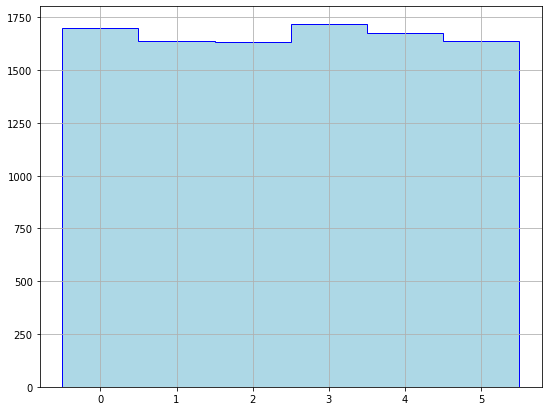

In [62]:
# uniform distribution
import random
from matplotlib import pyplot as plt

numbers = []
for _ in range(10000):
    numbers.append(random.randint(0, 5))
    

plt.hist(numbers, bins=6, range=(-0.5, 5.5), edgecolor='blue', color='lightblue', histtype="stepfilled")
plt.grid(True)
plt.show()

* Other modules provide random number generators: for example `numpy.random` 
    * e.g. allows to throw random numbers from a standard normal distribution.

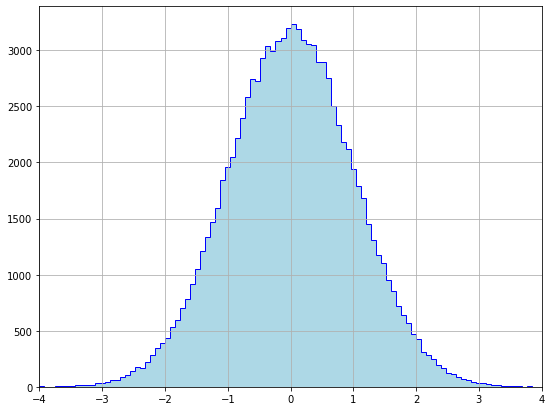

In [64]:
# normal distribution
from numpy.random import normal, seed
from matplotlib import pyplot as plt

seed(1)
numbers = normal(size=100000)
    
plt.hist(numbers, bins=100, range=(-4, 4), edgecolor='blue', color='lightblue', histtype="stepfilled")
plt.grid(True)
plt.xlim(-4, 4)
plt.show()

### Examples of Monte Carlo Simulation

#### Measure probability to get two kings drawing randomly two cards from a deck.


$$P_\textrm{two kings} = \frac{4}{40} \cdot \frac{3}{39} = \frac{1}{130} \approx 0.007692$$

* Let's now try with a Monte Carlo simulation:
  * frequentist approach: $\textrm{probability of event} = \cfrac{\textrm{n. successes}}{\textrm{n. experiments}}$


In [ ]:
# define the domain of inputs
from random import sample, seed

deck = ['A', 'K', 'J', 'Q', '7', '6', '5', '4', '3', '2'] * 4

seed(1)
def deck_sim(experiments):
    successes = 0.0
    for i in range(experiments):
        cards = sample(deck, 2)
        #if i < 10:
        #  print (cards)
        if cards == ['K', 'K']:
            successes += 1
    return successes

experiments = 10000
successes = deck_sim(experiments)
print (successes/experiments)

0.007


* **The precision of the result depends on the number of "successes".**
  * imagine to run only 100 experiments, it is highly probable that I get no successes at all, *should I conclude there is a 0 probability to get 2 kings ?*
  
* The lower is the probability of a succesful experiment the higher has to be the number of simulations, if the probability is small, we need to try many times
  * Monte Carlo Simulation is not always the best approach to follow !
  
## Accuracy of Monte Carlo Simulations

* Imagine you don't know the probability of getting two consecutive K from a deck:
    * what can be concluded from the result of a single MC experiment ?

In [ ]:
from random import sample, seed

seed(97)

experiments = 10000
successes = deck_sim(experiments)
print (successes/experiments)

0.0084


* Central Limit Theorem states: if $Y_1, Y_2,\dots, Y_n$ are $n$ random samples from a distribution $Y$ with true mean $\mu$ and variance $\sigma^{2}$, then when $n$ is sufficiently large, 

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i \approx \mathcal{N}(\mu, \sigma^2/n)$$

has approximately a normal distribution $\mathcal{N}(\mu, \sigma^2/n)$. 

* **This means that if ones repeates a MC experiment (changing the seed of the random number generator) she should obtain results normally distributed around the *true* value $\mu$.**

In [ ]:
# define the domain of inputs
import numpy as np
from random import sample, seed

experiments = 1000
trials = 10000
r = []
for e in range(experiments):
    seed(e)
    successes = deck_sim(trials)
    r.append(successes/trials)

print ("Mean: ", np.mean(r))
print ("Std : ", np.std(r))

Mean:  0.0076885
Std :  0.0008707799664668452


<center>

![](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/experiments.gif)

</center>

* Hence:
$$\mu_n - \mu \approx \mathcal{N}(0, \sigma^2/n) $$

* So considering various Monte Carlo experiment we can define an interval so that there is a certain probability to find $\mu$ in there.

$$ P\left(\mu_n - 1.96\frac{\sigma}{\sqrt{n}}\le \mu \le \mu_n + 1.96\frac{\sigma}{\sqrt{n}}\right) = 0.95$$

<center>

![](https://drive.google.com/uc?id=17clnr7Y7zBfuZVmrwdSStNX8V8hY1zwO)

</center>

* This interval is called **95% confidence interval** because the pink area covers 95% of the total area under the Gaussian.
    * if you repeat many times the above simulation, the fraction of calculated confidence intervals that contains the true parameter $\mu$ would tend toward 95%.


* The most common intervals are 99% and 95% confidence levels and are respectively defined as $\pm \cfrac{2.57\sigma}{\sqrt{n}}$ and $\pm \cfrac{1.96\sigma}{\sqrt{n}}$. 
    

In [ ]:
# define the confidence interval
from math import sqrt

print ("{:.6f} +- {:.6f} @ 95% confidence level".format(np.mean(r), 1.96*np.std(r)/sqrt(experiments)))

0.007689 +- 0.000054 @ 95% confidence level


* To get further information about the precision of our estimate $\mu_n$, or about the accuracy of the Monte Carlo simulation in general, we can use the standard deviation of the sampled mean. 

* Assuming statistical independence of the values in the sample, the standard deviation of the mean is 
$$\sigma _{\text{mean}}={\frac {1}{\sqrt {n}}}\sigma$$
where $n$ is the number of observations in the sample used to estimate the mean. 


In [ ]:
import numpy as np
from math import sqrt

print ("{:.6f} +- {:.6f}".format(np.mean(r), np.std(r)/sqrt(experiments)))

0.007689 +- 0.000028


* To get one more decimal digit of accuracy is like asking for an error one tenth as large, and that requires a 100-fold increase in computation.
* To get three more digits of accuracy requires one million times as much computation
  * *if you run the previous code for 10000 experiments (x10 times more) you should get a error 3 times smaller (from 2.8e-5 to about 9e-6)*.


## Stochastic Processes

* *deterministic process*: all data necessary to predict the system development with 100% certainty is available.
* *stochastic or random process*: exhibits behaviours that cannot be described by a deterministic model, is a *noisy* process where uncertainty needs to be modeled
    * it is a collection of random variables indexed by some set (usually time);
    * each random variable of the stochastic process is uniquely associated with an element in the set. 

![](https://drive.google.com/uc?id=1FDGbEvG-7qUqctzxcqFtzD4E7b3UO-I_)

* Stochastic processes are described by *stochastic differential equation* (SDE):

$$dX(t) = \mu(t,X(t)) dt + \sigma(t,X(t)) dW(t) = \underbrace{\mu(t,X(t))dt}_{\textrm{deterministic}} + \underbrace{\sigma(t,X(t)) \mathcal{N}(0,1)\sqrt{dt}}_{\textrm{stochastic}}$$ 

* The mean of $dW$ is zero and its variance is $dt$
    * the standard deviation grows with the square root of time: $W(t) ∼ \mathcal{N}( 0, t )$ because each $dW$ is distributed like independent standard Gaussian. 

<img src="https://drive.google.com/uc?id=1Omk5jlz0xT_ltMGWomZ1GW2kTOdQCKmU"> 

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


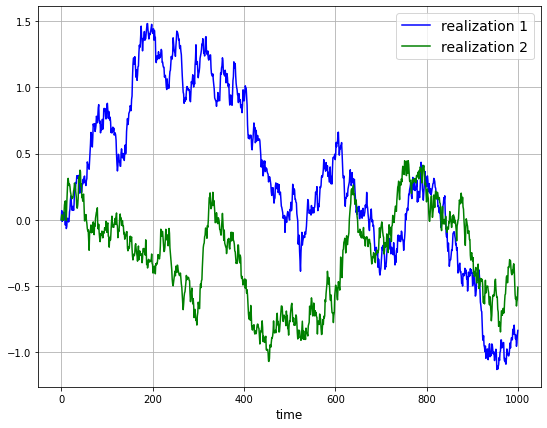

In [70]:
y = [0.0]
y1 = [0.0]

np.random.seed(10)
for t in range(1000):
  y.append(y[-1] + norm.rvs(size=1)*np.sqrt(1/365))
  y1.append(y1[-1] + norm.rvs(size=1)*np.sqrt(1/365))

plt.plot(y, label="realization 1")
plt.plot(y1, label="realization 2")
plt.grid(True)
plt.xlabel("time")
plt.legend()
plt.show()

### Geometric Brownian Motion

* Stock prices changes as a result of the random fluctuations given by the trades. 

* Consider a stock with an expected rate of return $\mu$.
* The relative change in its price in a period $dt$ can be decomposed into two parts:
    * **deterministic**, the expected return from the stock hold during the time period $dt$ ($\mu S_tdt$)
    * **stochastic** which reflects the random changes of the market (e.g. as a response to external effects such as unexpected news). A reasonable assumption is to take this contribution proportional to the stock ($\sigma S_t dW_t$).

* Hence the resulting SDE is:

$$dS_t = \mu S_tdt + \sigma S_tdW_t$$
or
$$\frac{dS_t}{S_t} = d\textrm{log}(S_t) = \mu dt + \sigma dW_t$$

* The solution of this SDE can be derived by applying the It$\hat{o}$'s formula (full derivation in the notes).

$$S_t = S_{t-1}e^{\big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma Z\sqrt{dt}}$$

* the change in $\textrm{log} S_t$ has a constant *drift* $\mu - \frac{1}{2}\sigma^2$ and a constant variance rate $\sigma^2$ (remember that $Z=\mathcal{N}(0,1)$) 
    * therefore $\textrm{log} S_t$ at some time $T$ is normally distributed with:


$$\textrm{log}\left(\cfrac{S_t}{S_{t-1}}\right) = \left(\mu - \frac{1}{2}\sigma^2\right)dt + \sigma Z\sqrt{dt} \approx\mathcal{N}\left[\left(\mu-\frac{\sigma^2}{2}\right)T, \sigma^2 T\right]$$


* **A variable whose logarithm is normally distributed is said to be log-normal**; 
    * lognormality is important because ensures a stock price will never be negative.


* Looking at the initial $dS$ equation we had that:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$

* which shows that the closer is $S_t$ to 0 the smaller is the $dS$ variation (so it will never go below 0).

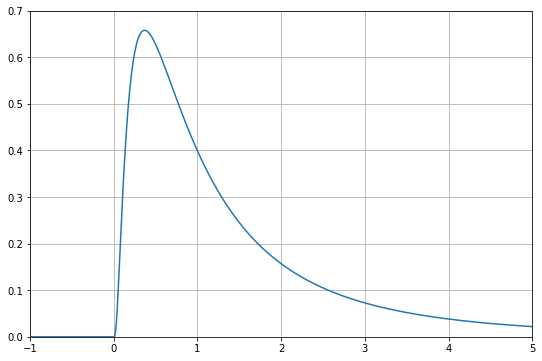

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import lognorm
import numpy as np


plt.rcParams['figure.figsize'] = (9, 6)
x = np.arange(-1, 5, 0.01)
plt.plot(x, lognorm.pdf(x, 1))
plt.xlim(-1, 5)
plt.ylim(0, 0.7)
plt.grid(True)
plt.show()

## Simulating Stochastic Differential Equations

* Consider an SDE of the  

$$dX(t) = \mu(t,X(t))dt + \sigma(t,X(t))dW(t)$$

* The simulation of $X(t)$ is done as follows:
  * starting from the value of $X(t_i)$ compute $X(t_{i+1})$ using the given SDE, setting $\Delta t = t_{i+1} - t_{i}$, and sampling from a standard normal $\mathcal{N}(0,1)$

$$X(t_{i+1}) = X(t_i) + \mu(t_i,X(t_i))\Delta t + \sigma(t_i,X(t_i))\sqrt{\Delta t}\mathcal{N}(0,1)$$

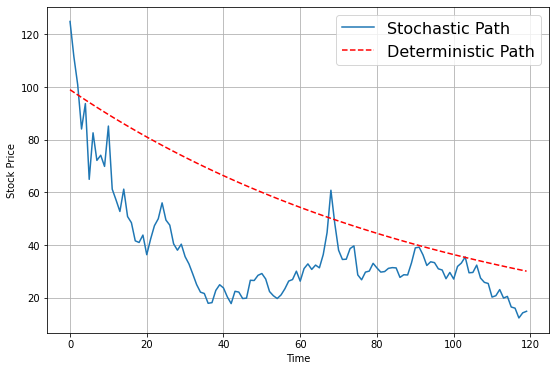

In [ ]:
# stock price evolution
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal, seed
from math import exp, sqrt

seed(1)
dT = 1
T = 120
S = 100
Sdet = 100 
mu = -0.01
sigma = 0.15
path = []
det_path = []
for _ in range(T):
    S = S*exp((mu-0.5*sigma**2)*dT+sigma*sqrt(dT)*normal())
    Sdet = Sdet*exp(mu*dT)
    path.append(S)
    det_path.append(Sdet)

plt.plot(path, label='Stochastic Path')
plt.plot(det_path, linestyle='--', color='red', label='Deterministic Path')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(fontsize='16')
plt.show()

## Pricing European Option via Monte Carlo

* MC simulation can be used to price derivatives. Consider an European Call Option with
  * $S_0$ = 107
  * $r$ = 0.03
  * $\sigma$ = 0.12
  * $K$ = 100
  * $(T - t_0)$ = 1 y

* The value of the option can be expressed as

$$C = e^{-r(T-t_0)}\mathbb{E}[\textrm{payoff}(S(T))] = e^{-r(T-t_0)}\mathbb{E}[ \textrm{max}(0, S(T) - K)]$$

* In order to estimate the right hand side we can 
  1. simulate various different stock paths (e.g. modelling $S(T)$ as a log-normal random variable);
  2. average the corresponding option payoffs (i.e. the expectation $\mathbb{E}$);
  3. finally discount the result.

In [ ]:
S0 = 107
r = 0.03
sigma = 0.12
T = 1
K = 100

In [ ]:
# simulate paths a compute the option price

import numpy as np
from numpy.random import normal, seed

seed(1)

payoffs = []
experiments = 100000
for i in range(experiments):
  St = S0 * np.exp((r - 0.5 * sigma * sigma) * T + sigma * np.sqrt(T) * normal())
  payoffs.append(np.exp(-r*T)*max(0, St-K))

C_MC = np.mean(payoffs)
cl95 =1.96*np.std(payoffs)/np.sqrt(experiments)
print ("BS call price: {:.3f} +- {:.3f} @ 95% confidence level".format(C_MC, cl95))

BS call price: 11.392 +- 0.022 @ 95% confidence level


* The result can be compared with the price given by the Black-Scholes formula

$$C_{\textrm{BS}}(S,t)=S_{t}\Phi(d_{1})-Ke^{-r(T-t)}\Phi(d_{2})$$

$$d_{1}={\frac  {\ln {\frac  {S_{t}}{K}}+\left(r+{\frac{1}{2}}\sigma^{2}\right)(T-t)}{\sigma \sqrt{T-t}}};\quad d_{{2}}=d_{1}-\sigma \sqrt{T-t}$$

where $\Phi$ is the CDF of the normal distribution.

In [ ]:
import numpy as np
from scipy.stats import norm

def call(St, K, r, sigma, ttm):
    return (St*norm.cdf(d_plus(St, K, r, sigma, ttm)) - K * \
            np.exp(-r*(ttm))*norm.cdf(d_minus(St, K, r, sigma, ttm)))
    
def d_plus(St, K, r, sigma, ttm):
    num = np.log(St/K) + (r + 0.5*sigma**2)*(ttm)
    den = sigma*np.sqrt(ttm)
    return num/den

def d_minus(St, K, r, sigma, ttm):
    return d_plus(St, K, r, sigma, ttm) - sigma*np.sqrt(ttm)

C_BS = call(S0, K, r, sigma, T)
print ("BS call price: {:.3f}".format(C_BS))

BS call price: 11.388


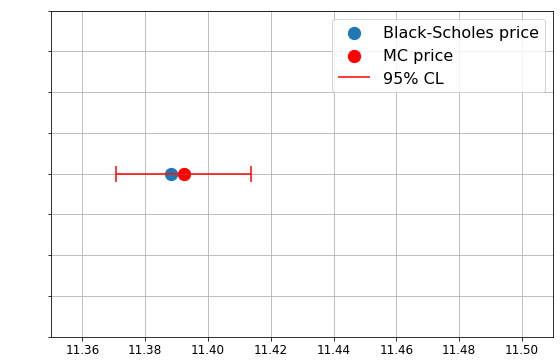

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 6)
plt.scatter(C_BS, 0, s=150, label='Black-Scholes price')
plt.scatter(C_MC, 0, s=150, color='red', label='MC price')
plt.hlines(0, C_MC-cl95, C_MC+cl95, color='red', label='95% CL')
plt.vlines(C_MC-cl95, -0.005, 0.005, color='red')
plt.vlines(C_MC+cl95, -0.005, 0.005, color='red')
plt.ylim(-0.1, 0.1)
plt.xlim(11.35, 11.51)
plt.yticks(color='w')
plt.xticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()